# Generative Modelling for Unsupervised Anomaly Detection on brain MRI

Tutorial for the AIM II course 

Date: 31.05.2023

Submission deadline: 15.06.2023

For questions please contact: cosmin.bercea@tum.de 

Please go through the notebook and: i). answer the questions marked with **Q** (6) and do the tasks markd with **T**(3)

There are 100 points in total: I. Auto-encoders (30 points); II. Generative auto-encoders (30 points); III. Diffusion Models (40 points)

## SETUP


### *Run these cells only when in Google Colab*

In [1]:
# # Clone the repository
# !git clone https://github.com/compai-lab/aim_generative_practical.git
# # Move all content to the current directory
# !mv ./aim_generative_practical/* ./
# # Remove the empty directory
# !rm -rf aim_generative_practical/


--2023-05-31 10:32:53--  https://get_link_from_moodle/data.zip
HTTP request sent, awaiting response... 200 OK
Length: 40922332 (39M) [application/x-zip-compressed]
Saving to: ‘./data/data.zip’

data.zip            100%[===================>]  39,03M  12,5MB/s    in 3,1s    

2023-05-31 10:32:56 (12,5 MB/s) - ‘./data/data.zip’ saved [40922332/40922332]



In [2]:
#!pip install pytorch_lightning --quiet

ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
# # Download the data
# !wget https://get_link_from_moodle/data.zip -P ./ 
# # Extract the data
#!unzip -q ./data.zip -d ./

In [1]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
import yaml

from model.model import AutoencoderModel
from data_loader import TrainDataModule, get_all_test_dataloaders

# autoreload imported modules
%load_ext autoreload
%autoreload 2

### Load the config

In [2]:
with open('./configs/train_config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Reproducibility
pl.seed_everything(config['seed'])

Global seed set to 3105


3105

## Data (IXI and FastMRI+) 

### Load and visualize the *healthy* data

Found 582 files in ./data/IXI
Using 465 images for training and 117 images for validation
Batch shape: torch.Size([32, 1, 128, 128])
Batch min: 0.0
Batch max: 1.0


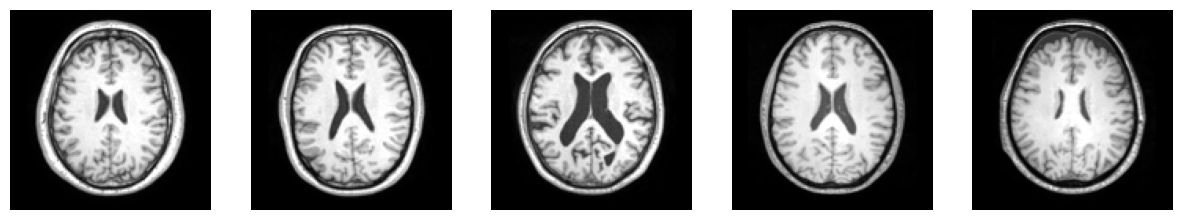

In [3]:
train_data_module = TrainDataModule(
    data_dir=config['train_data_dir'],
    target_size=config['target_size'],
    batch_size=config['batch_size'])

# Plot some images
batch = next(iter(train_data_module.train_dataloader()))

# Print statistics
print(f"Batch shape: {batch.shape}")
print(f"Batch min: {batch.min()}")
print(f"Batch max: {batch.max()}")

fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].imshow(batch[i].squeeze(), cmap='gray')
    ax[i].axis('off')
plt.show()

### Load and visualize the *anomalous* data

Disese types: dict_keys(['absent_septum', 'artefacts', 'craniatomy', 'dural', 'ea_mass', 'edema', 'encephalomalacia', 'enlarged_ventricles', 'intraventricular', 'lesions', 'mass', 'posttreatment', 'resection', 'sinus', 'wml', 'other'])


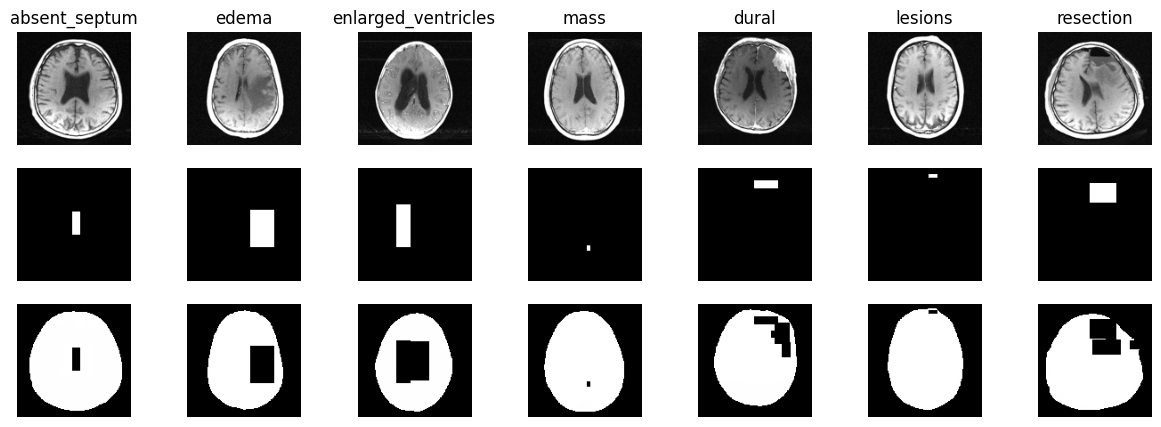

In [4]:
## Load and visualize anomalous data with labels 
# Get test dataloaders
test_dataloaders = get_all_test_dataloaders(config['split_dir'], config['target_size'], config['batch_size'])
print(f'Disese types: {test_dataloaders.keys()}')
diseases = ['absent_septum', 'edema', 'enlarged_ventricles', 'mass', 'dural', 'lesions', 'resection']
fig, ax = plt.subplots(3, len(diseases), figsize=(15, 5))
for i in range(len(diseases)):
  batch = next(iter(test_dataloaders[diseases[i]]))
  inputs, pos_labels, neg_masks = batch
  ax[0][i].imshow(inputs[i].squeeze(), cmap='gray')
  ax[0][i].axis('off')
  ax[1][i].imshow(pos_labels[i].squeeze(), cmap='gray')
  ax[1][i].axis('off')
  ax[2][i].imshow(neg_masks[i].squeeze(), cmap='gray')
  ax[2][i].axis('off')
  ax[0][i].set_title(diseases[i])

# Generative Modelling 

In [17]:
from IPython.display import Image, display, Markdown
display(Markdown("# I. Auto-encoders (AEs) [30/100 points]"))
display(Markdown("### In a nutshell: "))
display(Markdown("- AEs learn a compact representation of a data distribution, called the *latent space* or *bottleneck*"))
display(Markdown("- For example, if we train an AE on images of chest X-rays, we expect them to learn how to describe a healthy chest X-ray with meaningulf featurs, such as the *shape and size fo the lungs*, *intensity of the image*, *number of ribs*, *shape of the heart*, etc..."))

Image(url='./ae.gif')

# I. Auto-encoders (AEs) [30/100 points]

### In a nutshell: 

- AEs learn a compact representation of a data distribution, called the *latent space* or *bottleneck*

- For example, if we train an AE on images of chest X-rays, we expect them to learn how to describe a healthy chest X-ray with meaningulf featurs, such as the *shape and size fo the lungs*, *intensity of the image*, *number of ribs*, *shape of the heart*, etc...

In [6]:
display(Markdown("### Unsupervised Anomaly Detection"))

display(Markdown("The main assumption of unsupervised anomaly detection is that AEs can then only reconstruct what they have been trained on"))

display(Markdown("- Anomalies are thus detected based on *residual errors* between input and reconstruction"))

Image(url='./angelina.gif')

### Unsupervised Anomaly Detection

The main assumption of unsupervised anomaly detection is that AEs can then only reconstruct what they have been trained on

- Anomalies are thus detected based on *residual errors* between input and reconstruction

### [5/30] ----------------------------------------- Q1----------------------------------------- 
 **Q1:** Why are AEs in their simplest form not considered generative models? 

### [5/30] ----------------------------------------- Q2----------------------------------------- 

**Q2:** What does it take to turn simple AEs into generative models? 

### [20 points] ----------------------------------------- T1----------------------------------------- 

### **T1:** Train an AE
We have prepared an autoencoder model ready for you to train, check the model folder for more details.

### [10/30] ----------------------------------------- T1 A----------------------------------------- 

**T1A:** Implement evaluate_healthy() function from evaluate.py script. For the evaluation of the model on the healthy data you have to implement the evaluate_healthy function from the evaluate.py script. You can take inspiration from the evluate function that is already implemented
- **T2B:** Please train the model with the provided scripts, evaluate the results and answer the questions.
 [Hint]: Use the normal_test.csv file to load healthy FastMRI + test images. 

### [5/30] ----------------------------------------- Q3 ----------------------------------------- 

**Q3:** How does the model perform in terms of reconstruction accuarcy on the healthy images?

### [5/30] ----------------------------------------- Q4 ----------------------------------------- 

**Q4:** How does the model perform in anomlay detection? What diseases are easy to detect, what diseases are more diffucult? Why? 


## Tensorboard

In [19]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 25091), started 10:01:59 ago. (Use '!kill 25091' to kill it.)

## Prepare model

In [5]:
# Init model
model = AutoencoderModel(config)

# Use tensorboard logger and CSV logger
trainer = pl.Trainer(
    max_epochs=config['num_epochs'],
    logger=[
        pl.loggers.TensorBoardLogger(save_dir='./'),
        pl.loggers.CSVLogger(save_dir='./')
    ],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


## Run training

In [6]:
# Train the model
trainer.fit(model, datamodule=train_data_module)


  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 388 K 
1 | decoder | Sequential | 388 K 
2 | loss_fn | MSELoss    | 0     
---------------------------------------
776 K     Trainable params
0         Non-trainable params
776 K     Total params
3.105     Total estimated model params size (MB)


{'seed': 3105, 'train_data_dir': './data/IXI', 'split_dir': './data/splits', 'target_size': [128, 128], 'batch_size': 32, 'num_epochs': 20, 'lr': 0.001}


/opt/anaconda3/envs/aim/lib/python3.9/site-packages/lightning_fabric/loggers/csv_logs.py:188: UserWarning: Experiment logs directory ./lightning_logs/version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
  rank_zero_warn(


Sanity Checking: 0it [00:00, ?it/s]

/opt/anaconda3/envs/aim/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/anaconda3/envs/aim/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/anaconda3/envs/aim/lib/python3.9/site-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (15) is smaller than the logging interval Trainer(log_e

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/opt/anaconda3/envs/aim/lib/python3.9/site-packages/pytorch_lightning/trainer/call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


## Evaluation

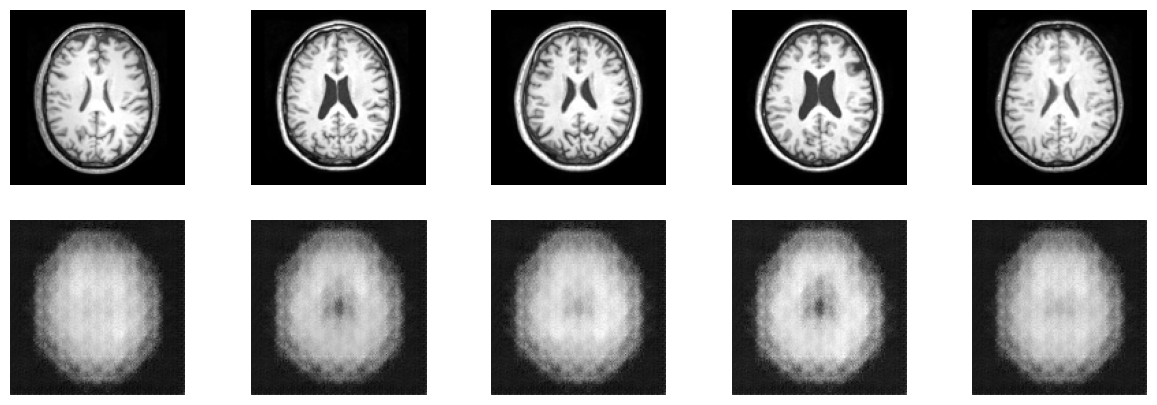

In [7]:
# Reconstructions from the validation set
batch = next(iter(train_data_module.val_dataloader()))

with torch.inference_mode():
    results = model.detect_anomaly(batch)
    reconstructions = results['reconstruction']

# Plot images and reconstructions
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):
    ax[0][i].imshow(batch[i].squeeze(), cmap='gray')
    ax[0][i].axis('off')
    ax[1][i].imshow(reconstructions[i].squeeze(), cmap='gray')
    ax[1][i].axis('off')

### Evalute anomaly detection

In [8]:
from evaluate import Evaluator 

evaluator = Evaluator(model, model.device, test_dataloaders)

metrics, fig_metrics, fig_example = evaluator.evaluate()

Setting up [LPIPS] perceptual loss: trunk [squeeze], v[0.1], spatial [on]
Loading model from: /opt/anaconda3/envs/aim/lib/python3.9/site-packages/lpips/weights/v0.1/squeeze.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/opt/anaconda3/envs/aim/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/aim/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/anaconda3/envs/aim/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weig

Loading model from: /opt/anaconda3/envs/aim/lib/python3.9/site-packages/lpips/weights/v0.1/alex.pth
*********************** DATASET: absent_septum ********************
L1 mean: 0.14349313080310822 +/- 0.0
LPIPS mean: 0.6478061676025391 +/- 0.0
SSIM mean: 0.15485022955114228 +/- 0.0
TP mean: 1.0 +/- 0.0
TP: 1 of 1 detected
FP mean: 55.0 +/- 0.0
FP: 55 missed
Precision mean: 0.017857142857142856 +/- 0.0
Recall mean: 1.0 +/- 0.0
F1 mean: 0.035087718953524166 +/- 0.0
*********************** DATASET: artefacts ********************
L1 mean: 0.13288754876703024 +/- 0.015928617951477316
LPIPS mean: 0.5553503632545471 +/- 0.03946331515908241
SSIM mean: 0.11874008881515782 +/- 0.015758749358030344
TP mean: 1.0 +/- 0.0
TP: 16 of 16 detected
FP mean: 61.0625 +/- 58.27785680470757
FP: 977 missed
Precision mean: 0.04913620629308695 +/- 0.05563323932904755
Recall mean: 1.0 +/- 0.0
F1 mean: 0.08868990704473803 +/- 0.0940137505433717
*********************** DATASET: craniatomy ********************
L1 m

In [15]:
print(f'Available metrics: {fig_metrics.keys()}')
fig_metrics['F1']

Available metrics: dict_keys(['L1', 'LPIPS', 'SSIM', 'TP', 'FP', 'Precision', 'Recall', 'F1'])


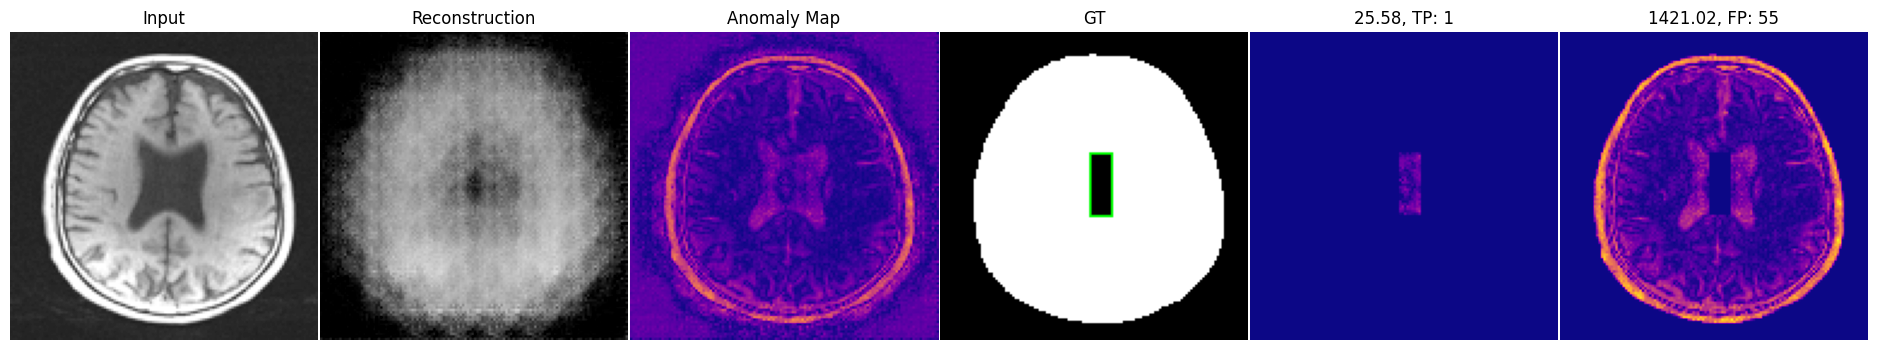

In [12]:
fig_example


# II. Generative AEs [30 points]

### [15 points] ----------------------------------------- T2----------------------------------------- 

[15/30] **T2:** Extend to provided AE to be a *generative* model (There is not a single solution!)

[Hint]: Think about the *latent space*. You might need additional losses :)

### [15 points] ----------------------------------------- Q5----------------------------------------- 


[15/30] **Q5:** Train and evaluate your generative AE. How does it compare to the AE we provided? 

In [23]:
display(Markdown("## III. Diffusion Models [40 points]"))
display(Markdown("### In a nutshell: "))
display(Markdown("- Learn how to noise and de-noise an image"))
display(Markdown("- Noise granularity (e.g., noise level t) or noise type (e.g. Gaussian or Simplex) can vary"))


Image(url='./diff.gif')

## III. Diffusion Models [40 points]

### In a nutshell: 

- Learn how to noise and de-noise an image

- Noise granularity (e.g., noise level t) or noise type (e.g. Gaussian or Simplex) can vary

In [18]:
display(Markdown("### Anomaly Detection with Diffusion Models"))
display(Markdown("- Main idea: Destroy the structure of anomalies and reconstruct pseudo-healthy images."))


### Anomaly Detection with Diffusion Models

- Main idea: Destroy the structure of anomalies and reconstruct pseudo-healthy images.

### [5/40] ----------------------------------------- Q6----------------------------------------- 

**Q6:** Why are diffusion probalistic models considered to be generative models? 

### [35 points] ----------------------------------------- T3----------------------------------------- 

**T3**: Evaluate diffusion models 

### [5/40] ----------------------------------------- T3a----------------------------------------- 

- **T3a**: Load and evaluate diffuson models on the same task as before (noise level t=200).

[Hint]: You are allowed to only choose a couple of images and only qualitatively asses the results since the inference time might be signifcant. 

### Load weights 

In [28]:
!wget https://get_link_from_moodle/latest_model.pt.zip # weights 
!unzip -q latest_model.pt.zip 

--2023-05-31 21:55:35--  https://get_link_from_moodle/latest_model.pt.zip
Length: 200797607 (191M) [application/x-zip-compressed]
Saving to: ‘latest_model.pt.zip.1’

latest_model.pt.zip 100%[===================>] 191,50M  2,57MB/s    in 75s     

2023-05-31 21:56:50 (2,54 MB/s) - ‘latest_model.pt.zip.1’ saved [200797607/200797607]

replace latest_model.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [19]:
with open('./configs/diffusion_config.yaml', 'r') as f:
    diff_config = yaml.safe_load(f)

In [20]:
from model.ddpm import DDPM

In [21]:
diff_config

{'spatial_dims': 2,
 'in_channels': 1,
 'out_channels': 1,
 'num_channels': [128, 256, 256],
 'attention_levels': [False, True, True],
 'num_res_blocks': 1,
 'num_head_channels': 256,
 'train_scheduler': 'ddpm',
 'inference_scheduler': 'ddpm',
 'inference_steps': 1000,
 'noise_level': 300,
 'noise_type': 'gaussian',
 'prediction_type': 'epsilon'}

In [22]:
diff_config
anoddpm = DDPM(**diff_config)

In [49]:
### ----------------------------------------- ToDO ---------------------------------------- 
# load weights
checkpoint = None ## TODO load checkpoint from file 

In [50]:
print(f'Disese types: {test_dataloaders.keys()}')
batch = next(iter(test_dataloaders['edema']))[0]

Disese types: dict_keys(['absent_septum', 'artefacts', 'craniatomy', 'dural', 'ea_mass', 'edema', 'encephalomalacia', 'enlarged_ventricles', 'intraventricular', 'lesions', 'mass', 'posttreatment', 'resection', 'sinus', 'wml', 'other'])


In [51]:
t=200
x_, _ = anoddpm.sample_from_image(batch, noise_level=t)


  0%|                                                                                                                                                     | 0/201 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [52]:
x_.shape

NameError: name 'x_' is not defined

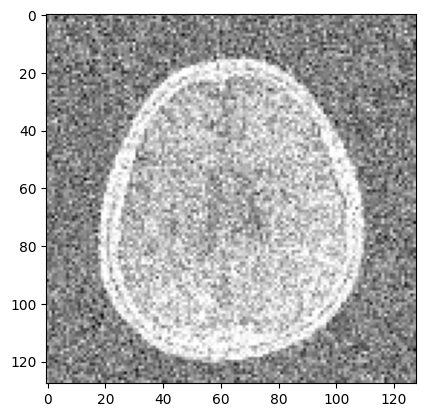

In [61]:
plt.imshow(x_[2][0], cmap='gray')
plt.show()

### [10/40] ----------------------------------------- Q6 ----------------------------------------- 

**Q6:** How does it compare to AEs? (Consider the quality of the reconstruction and the ability to remove the anomalies.)


### [20/40] ----------------------------------------- T3b ----------------------------------------- 

Evaluate diffusion with different time-steps (t), what do you notice? Find a case for which a noise level works good and one where it doesn't. Why do you think this happened? 

### That's it!